In [260]:
import pandas as pd
from matplotlib import pyplot as plot
import matplotlib.style as style
import seaborn as sns
df_policy = pd.read_csv("./data/policy_stats_history.csv")
df_default = pd.read_csv("./data/default_stats_history.csv")
#df_policy = pd.read_csv("./data/policy_5_stats_history.csv")
#df_default = pd.read_csv("./data/default_5_stats_history.csv")
prefix = ""

df_policy_desc = pd.read_csv("./data/policy_stats.csv")
df_default_desc = pd.read_csv("./data/default_stats.csv")

In [261]:
## Prepare data
def dropUnwanted(df):
    df = df[["Type", "Timestamp","Total Request Count", "Total Median Response Time"]]
    df = df.dropna(how='any')
    df = df.drop_duplicates(subset=["Total Request Count"])
    df = df[(df[["Total Request Count"]] != 0).all(axis=1)]
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
    return df
    
df_policy = dropUnwanted(df_policy)
df_default = dropUnwanted(df_default)

df_policy.tail()

,Type,Timestamp,Total Request Count,Total Median Response Time
1570,GET,2020-07-22 22:19:30,396,900
1572,GET,2020-07-22 22:19:32,397,900
1576,GET,2020-07-22 22:19:36,398,900
1580,GET,2020-07-22 22:19:40,399,900
1582,GET,2020-07-22 22:19:42,400,900


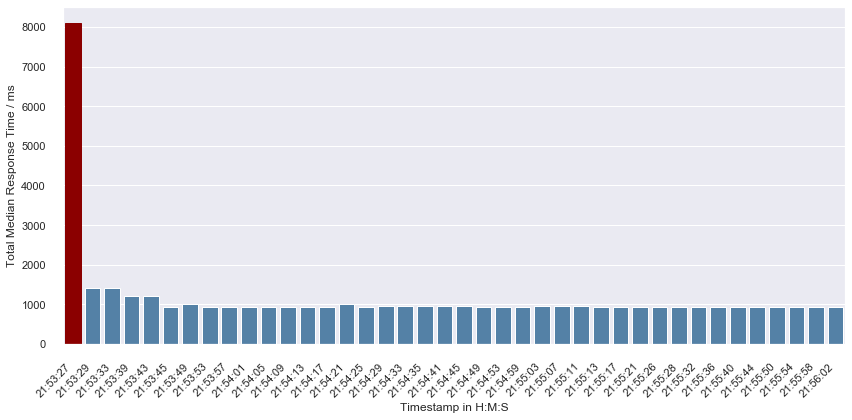

In [262]:
sns.set(style="darkgrid")
plot.rcParams['figure.figsize'] = [10/2.54, 8/2.54]

def plotBar(df):
    fig, ax = plot.subplots(figsize = (12,6))    
    fig = sns.barplot(x=df['Timestamp'], y=df['Total Median Response Time'], color="steelblue")  

    x_dates = df['Timestamp'].dt.strftime('%H:%M:%S').sort_values().unique()
    ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
    ax.patches[0].set_color('darkred')
    ax.set_ylabel("Total Median Response Time / ms")
    ax.set_xlabel("Timestamp in H:M:S")    

plotBar(df_policy.head(n=40))
plot.savefig('policy' + prefix + '.eps', format='eps')

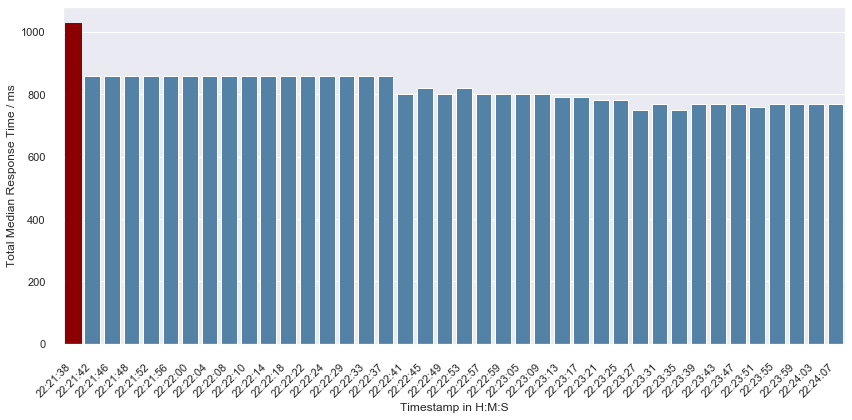

In [263]:
plotBar(df_default.head(n=40))
plot.savefig('default' + prefix + '.eps', format='eps')

In [264]:
[df_default['Total Median Response Time'].iloc[-1], df_policy['Total Median Response Time'].iloc[-1]]

[790, 900]

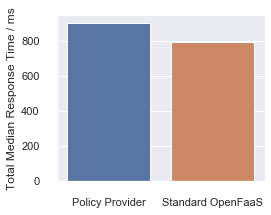

In [265]:
plot.rcParams.update({'figure.autolayout': True})
fig, ax = plot.subplots()    
fig = sns.barplot(x=['Policy Provider', "Standard OpenFaaS"], y=[df_policy['Total Median Response Time'].iloc[-1], df_default['Total Median Response Time'].iloc[-1]])
ax.set_ylabel("Total Median Response Time / ms")
plot.savefig('median' + prefix + '.eps', format='eps')

In [266]:
df_default_desc.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999%,100%
0,GET,/function/performance-scores-gdpr,400,0,790.0,820.573703,635.227203,1911.576986,222.52,0.26397,...,860,880,970,1100,1300,1400,1900,1900,1900,1900
1,NaN,Aggregated,400,0,790.0,820.573703,635.227203,1911.576986,222.52,0.26397,...,860,880,970,1100,1300,1400,1900,1900,1900,1900


In [267]:
df_policy_desc.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999%,100%
0,GET,/function/performance-scores?policy=gdpr,400,0,900.0,966.301165,670.473099,8106.184006,309.2925,0.252435,...,1000,1100,1200,1300,1500,1600,8100,8100,8100,8100
1,NaN,Aggregated,400,0,900.0,966.301165,670.473099,8106.184006,309.2925,0.252435,...,1000,1100,1200,1300,1500,1600,8100,8100,8100,8100
